In [1]:
import os
os.chdir('../')
os.getcwd()

'/work'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [4]:
from process.preprocess.get_set_options import get_configs
from process.preprocess.get_dataset import _make_dataset_uci

In [5]:
CONFIG_DIR_UCI = './configs/experiments_uci.yml'

# 関数

## ドメインごとのデータ数取得

In [6]:
def get_data_num(config_all, dataset_name):
    config = config_all["datasets"][dataset_name]
    df = _make_dataset_uci(config)
    
    return df.groupby(config["split_feature"]).count()[config["y_feature"]]

## データプロット取得

In [23]:
def plot_y_countplot(df, split_col, target_col):
    ax = sns.countplot(x=split_col, hue=target_col, data=df)
#     handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
    
    return ax


def plot_y_boxplot(df, split_col, target_col):
    ax = sns.boxplot(x=split_col, y=target_col, data=df)
    
    return ax


def plot_pca(df, split_col, target_col):

    features_ori = df.drop(columns=[split_col,target_col])
    is_cat_cols = features_ori.dtypes == object
    cat_cols = features_ori.columns[is_cat_cols]
    num_cols = features_ori.columns[~is_cat_cols]

    if len(cat_cols)>0:
        onehot = OneHotEncoder(sparse=False)
        features_cat = onehot.fit_transform(features_ori[cat_cols])
    else:
        features_cat = np.empty(0)

    if len(num_cols)>0:
        scaler = StandardScaler()
        features_num = scaler.fit_transform(features_ori[num_cols].values)
    else:
        features_num = np.empty(0)

    print(features_cat.shape, features_num.shape)
    if len(cat_cols)>0 & len(num_cols)>0:
        features = np.concatenate([features_num, features_cat], axis=1)
    elif len(cat_cols)>0:
        features = features_cat
    elif len(num_cols)>0:
        features = features_num
    pca = PCA(n_components=2, random_state=0)
    features_embedd = pca.fit_transform(features)

    df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
    df_embedd[split_col] = df[split_col]
    df_embedd[target_col] = df[target_col]

    ax = sns.relplot(x="embedd_x", y="embedd_y", hue=target_col, col=split_col, data=df_embedd)
    
    return ax, df_embedd


def get_plots(config_all, dataset_name):
    config = config_all["datasets"][dataset_name]
    df = _make_dataset_uci(config)
    y_feature = config["y_feature"]
    split_feature = config["split_feature"]
    if config['task']=="classification":
        ax_y = plot_y_countplot(df, split_feature, y_feature)
    else:
        ax_y = plot_y_boxplot(df, split_feature, y_feature)
    ax_pca, df_embedd = plot_pca(df, split_feature, y_feature)
    
    return ax_y, ax_pca, df_embedd

In [24]:
config_all = get_configs(None, CONFIG_DIR_UCI)

# 各データセットごとに分析

## mushroom

In [25]:
get_data_num(config_all, "mushroom")

stalk_shape
e    3516
t    4608
Name: Attributes, dtype: int64

(8124, 115) (0,)


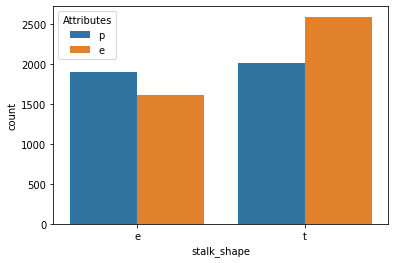

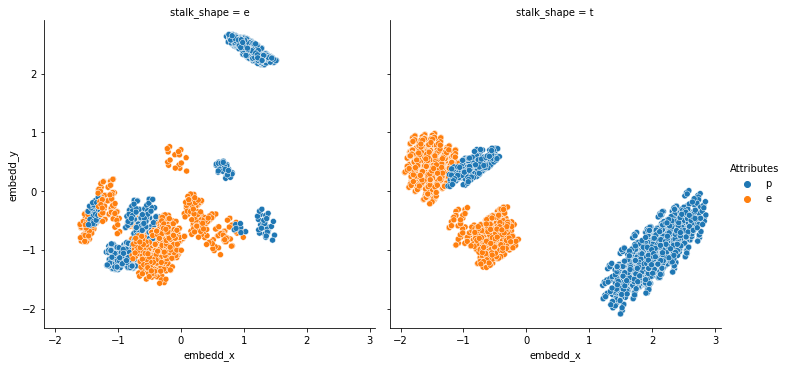

In [26]:
fig_y, fig_pca, _ = get_plots(config_all, "mushroom")

## banknote

In [27]:
get_data_num(config_all, "banknote")

curtosis_CAT
0    459
1    456
2    457
Name: class (integer), dtype: int64

(0,) (1372, 3)


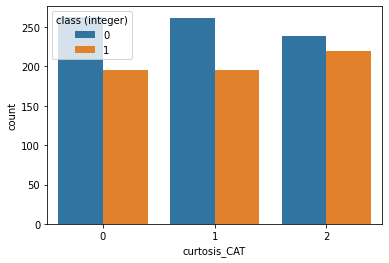

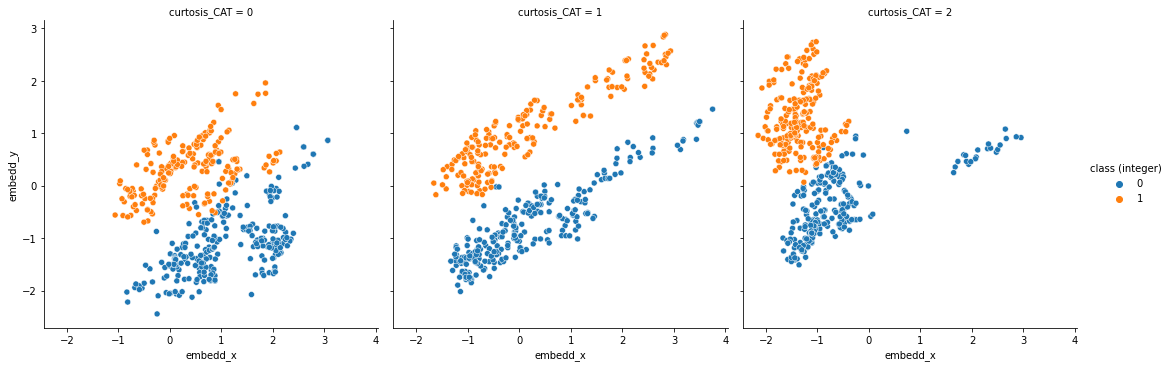

In [28]:
fig_y, fig_pca, _ = get_plots(config_all, "banknote")

# default

In [29]:
get_data_num(config_all, "default")

PAY_3_CAT
0    10023
1    15764
2     4213
Name: default payment next month, dtype: int64

(0,) (30000, 23)


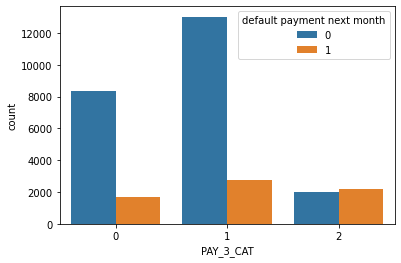

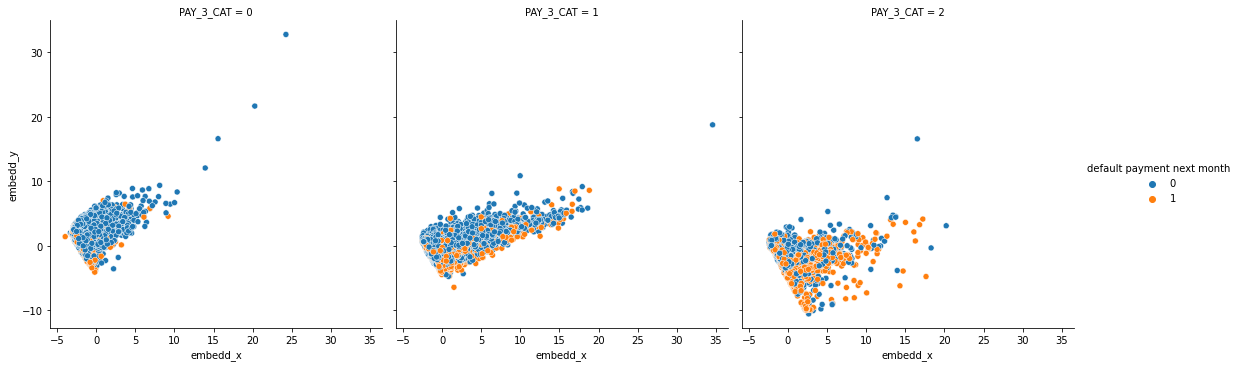

In [30]:
fig_y, fig_pca, _ = get_plots(config_all, "default")

## concrete

In [31]:
get_data_num(config_all, "concrete")

Water_CAT
0    349
1    427
2    253
Name: Concrete compressive strength, dtype: int64

(0,) (1029, 7)


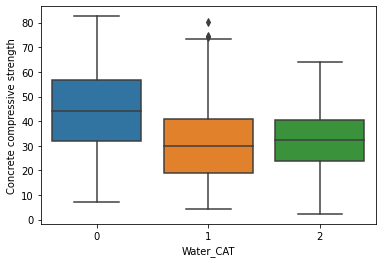

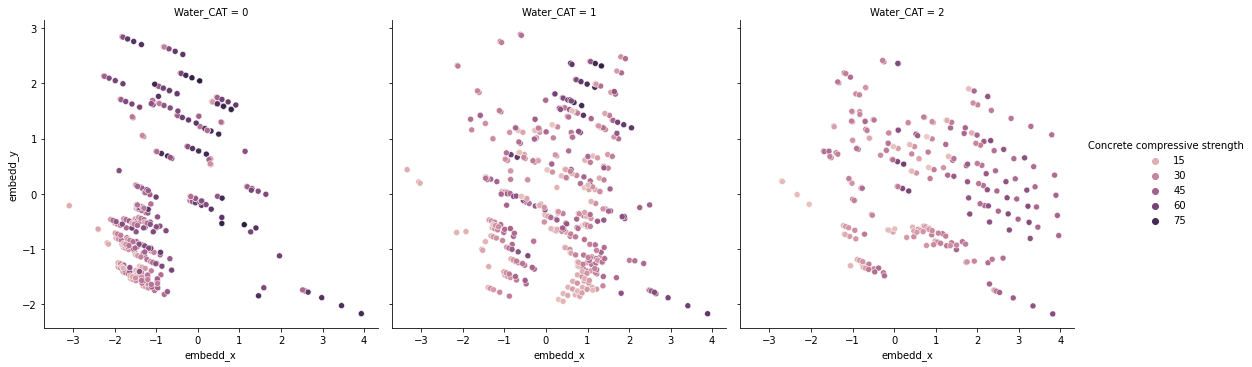

In [32]:
fig_y, fig_pca, _ = get_plots(config_all, "concrete")

## qsar

In [33]:
get_data_num(config_all, "qsar")

SM1_Dz_CAT
0    306
1    304
2    298
Name: quantitative response, dtype: int64

(0,) (908, 5)


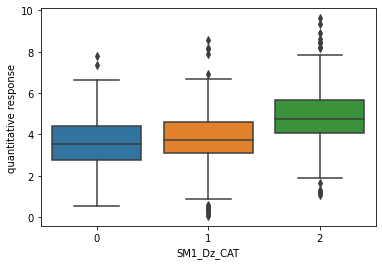

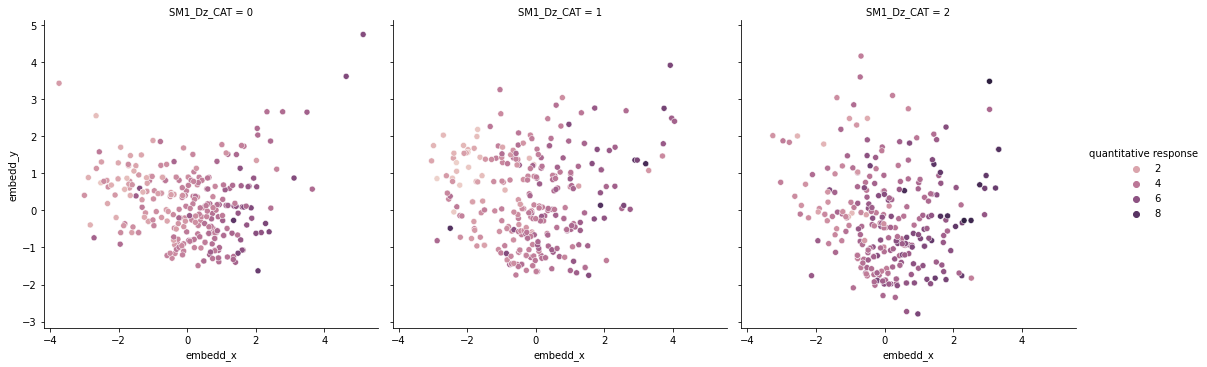

In [34]:
fig_y, fig_pca, _ = get_plots(config_all, "qsar")

## bike

In [35]:
get_data_num(config_all, "bike")

yr
0    365
1    366
Name: cnt, dtype: int64

(0,) (731, 10)


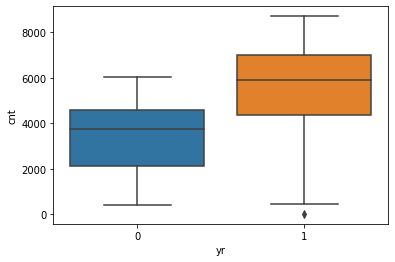

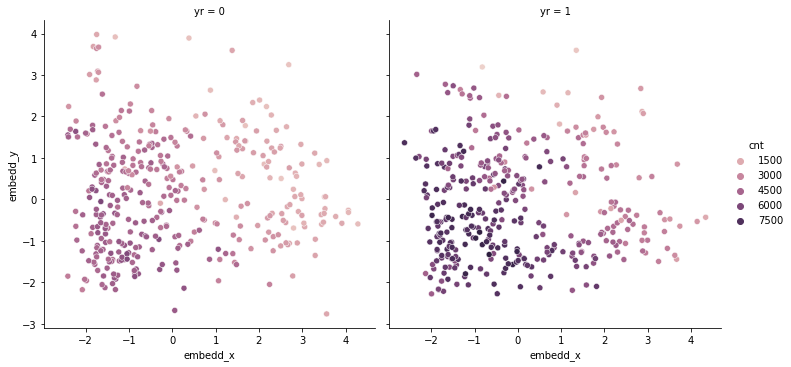

In [36]:
fig_y, fig_pca, _ = get_plots(config_all, "bike")

## traffic

In [37]:
get_data_num(config_all, "traffic")

is_holiday
0    46795
1     1409
Name: traffic_volume, dtype: int64

(48204, 11) (48204, 8)


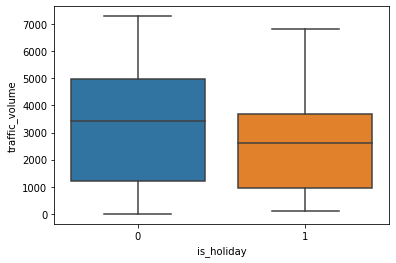

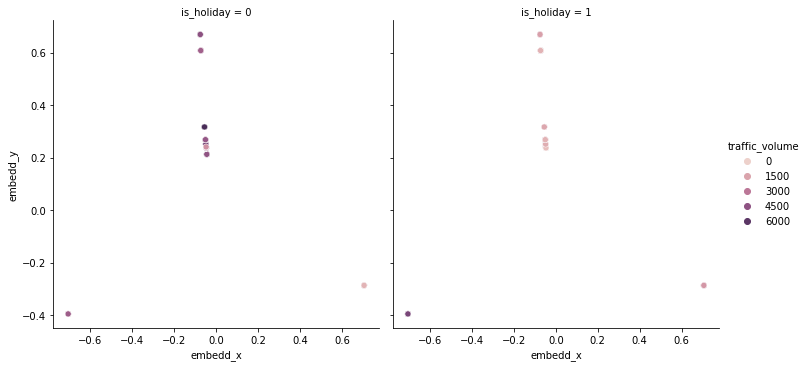

In [38]:
fig_y, fig_pca, df_embedd_traffic = get_plots(config_all, "traffic")

trafficだけうまく次元圧縮できていないので原因を探す

In [39]:
df_embedd_traffic

,embedd_x,embedd_y,is_holiday,traffic_volume
0,0.705553,-0.286617,0,5545
1,0.705553,-0.286617,0,4516
2,0.705553,-0.286617,0,4767
3,0.705553,-0.286617,0,5026
4,0.705553,-0.286617,0,4918
...,...,...,...,...
48199,0.705553,-0.286617,0,3543
48200,0.705553,-0.286617,0,2781
48201,-0.047189,0.240737,0,2159
48202,0.705553,-0.286617,0,1450


In [42]:
df = _make_dataset_uci(config_all["datasets"]["traffic"])
df

,temp,rain_1h,snow_1h,clouds_all,weather_main,traffic_volume,is_holiday,year,month,day,hour
0,288.28,0.0,0.0,40,Clouds,5545,0,2012,10,2,9
1,289.36,0.0,0.0,75,Clouds,4516,0,2012,10,2,10
2,289.58,0.0,0.0,90,Clouds,4767,0,2012,10,2,11
3,290.13,0.0,0.0,90,Clouds,5026,0,2012,10,2,12
4,291.14,0.0,0.0,75,Clouds,4918,0,2012,10,2,13
...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,3543,0,2018,9,30,19
48200,282.76,0.0,0.0,90,Clouds,2781,0,2018,9,30,20
48201,282.73,0.0,0.0,90,Thunderstorm,2159,0,2018,9,30,21
48202,282.09,0.0,0.0,90,Clouds,1450,0,2018,9,30,22


weather_main="Thunderstorm"の行だけほかの表示されている行と違うx,yの値を持っている<br>
つまり、weahter_mainの変数に次元圧縮がうまくいかない原因がありそう

In [44]:
df["weather_main"].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

カテゴリ数が多くこれが原因かも

### weather_mainのカラムを除いて再度可視化

(0,) (48204, 8)


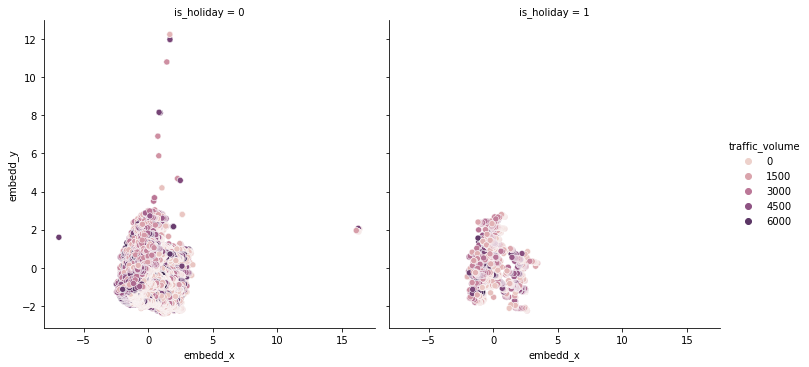

In [47]:
fig_pca_, df_embedd_traffic_ = plot_pca(df.drop(columns=["weather_main"]), "is_holiday", "traffic_volume")

少しはよくなった

In [48]:
%%debug
1+1

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(2)<module>()



ipdb>  df_embedd_traffic_


       embedd_x  embedd_y  is_holiday  traffic_volume
0     -0.700208  1.497680           0            5545
1     -0.549100  1.883774           0            4516
2     -0.491554  2.059067           0            4767
3     -0.557785  2.066720           0            5026
4     -0.754939  1.905461           0            4918
...         ...       ...         ...             ...
48199 -0.809825 -0.097864           0            3543
48200 -0.702248  0.086331           0            2781
48201 -0.736590  0.099658           0            2159
48202 -0.737395  0.118952           0            1450
48203 -0.775037  0.131692           0             954

[48204 rows x 4 columns]


ipdb>  


       embedd_x  embedd_y  is_holiday  traffic_volume
0     -0.700208  1.497680           0            5545
1     -0.549100  1.883774           0            4516
2     -0.491554  2.059067           0            4767
3     -0.557785  2.066720           0            5026
4     -0.754939  1.905461           0            4918
...         ...       ...         ...             ...
48199 -0.809825 -0.097864           0            3543
48200 -0.702248  0.086331           0            2781
48201 -0.736590  0.099658           0            2159
48202 -0.737395  0.118952           0            1450
48203 -0.775037  0.131692           0             954

[48204 rows x 4 columns]


ipdb>  


       embedd_x  embedd_y  is_holiday  traffic_volume
0     -0.700208  1.497680           0            5545
1     -0.549100  1.883774           0            4516
2     -0.491554  2.059067           0            4767
3     -0.557785  2.066720           0            5026
4     -0.754939  1.905461           0            4918
...         ...       ...         ...             ...
48199 -0.809825 -0.097864           0            3543
48200 -0.702248  0.086331           0            2781
48201 -0.736590  0.099658           0            2159
48202 -0.737395  0.118952           0            1450
48203 -0.775037  0.131692           0             954

[48204 rows x 4 columns]


ipdb>  q
